     datetime  tempmax  tempmin  temp
0  01-01-2023     20.1      7.9  13.4
1  02-01-2023     17.0      9.0  12.4
2  03-01-2023     15.3      7.9  11.2
3  04-01-2023     15.0      6.9   9.6
4  05-01-2023     14.5      5.7   8.9


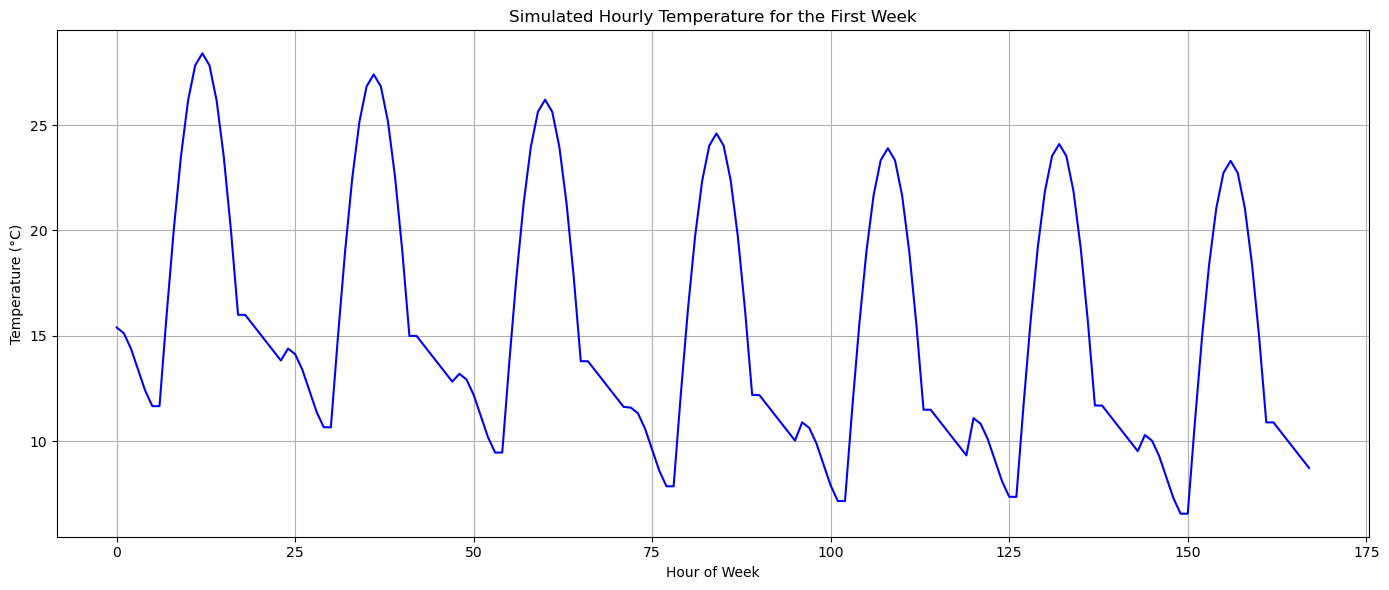

Hourly temperature simulation completed and saved as 'simulated_hourly_temperature.csv'.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file containing daily temperatures (adjust file path and column names as needed)
csv_file = 'temp_data_delhi.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Check the first few rows of the dataframe to understand the format and column names
print(df.head())

# Ensure that the 'Date' column is in datetime format
# Assuming the date format is "DD-MM-YYYY"
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')

# Extract the temperature at 00:00 hrs each day
daily_temp_00hrs = df['temp'].values

# Number of days and hours
days = len(daily_temp_00hrs)
total_hours = days * 24
time = np.arange(total_hours)  # Time array (in hours)

# Function to simulate hourly temperature for a given day based on the midnight temperature
def simulate_hourly_temp(daily_temp_at_midnight):
    """
    Simulate the hourly temperature for a given day using a smooth transition from midnight to midnight.
    Ensure that the peak temperature during the day is no more than 15°C higher than the midnight temperature.
    """
    # Create a time array for 24 hours for this specific day
    day_hours = np.arange(24)

    # Smooth decrease from 00:00 to 06:00 (no subtraction, just a small change based on a smooth curve)
    temp_morning = daily_temp_at_midnight + 2 * np.cos(np.pi * day_hours[:6] / 6)
    
    # Maximum peak temperature allowed is 15°C higher than midnight temperature
    max_day_temp = daily_temp_at_midnight + 15  # This is the upper limit for the daytime temperature
    
    # Smooth increase from 06:00 to 18:00 (increase temperature) but ensure it doesn't exceed max_day_temp
    temp_day = temp_morning[-1] + (max_day_temp - temp_morning[-1]) * np.sin(np.pi * (day_hours[6:18] - 6) / 12)
    
    # Smooth decrease from 18:00 to next day's midnight
    temp_night = temp_day[-1] - (temp_day[-1] - daily_temp_at_midnight) * (day_hours[18:] - 18) / 6

    # Concatenate all parts for a full day's temperature
    full_day_temp = np.concatenate([temp_morning, temp_day, temp_night])
    
    return full_day_temp

# Create an array to store hourly temperatures
hourly_temp = np.zeros(total_hours)

# Populate the hourly temperatures for each day
for i in range(days):
    daily_temp_at_midnight = daily_temp_00hrs[i]
    
    # Get the hourly temperature for this day
    start_index = i * 24
    end_index = (i + 1) * 24
    hourly_temp[start_index:end_index] = simulate_hourly_temp(daily_temp_at_midnight)

# Plotting the simulated hourly temperatures for the first week (7 days = 7 * 24 = 168 hours)
plt.figure(figsize=(14, 6))

# Plot for the first week (first 7 days = 7 * 24 = 168 hours)
plt.plot(np.arange(168), hourly_temp[:168], label='Hourly Temperature', color='b')
plt.title('Simulated Hourly Temperature for the First Week')
plt.xlabel('Hour of Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Save the hourly temperature data to a new CSV file
output_df = pd.DataFrame({
    'Time (hours)': time,
    'Hourly Temperature (°C)': hourly_temp
})

# Save the data to CSV
output_df.to_csv('simulated_hourly_temperature.csv', index=False)

print("Hourly temperature simulation completed and saved as 'simulated_hourly_temperature.csv'.")


     datetime  tempmax  tempmin  temp
0  01-01-2023     20.1      7.9  13.4
1  02-01-2023     17.0      9.0  12.4
2  03-01-2023     15.3      7.9  11.2
3  04-01-2023     15.0      6.9   9.6
4  05-01-2023     14.5      5.7   8.9


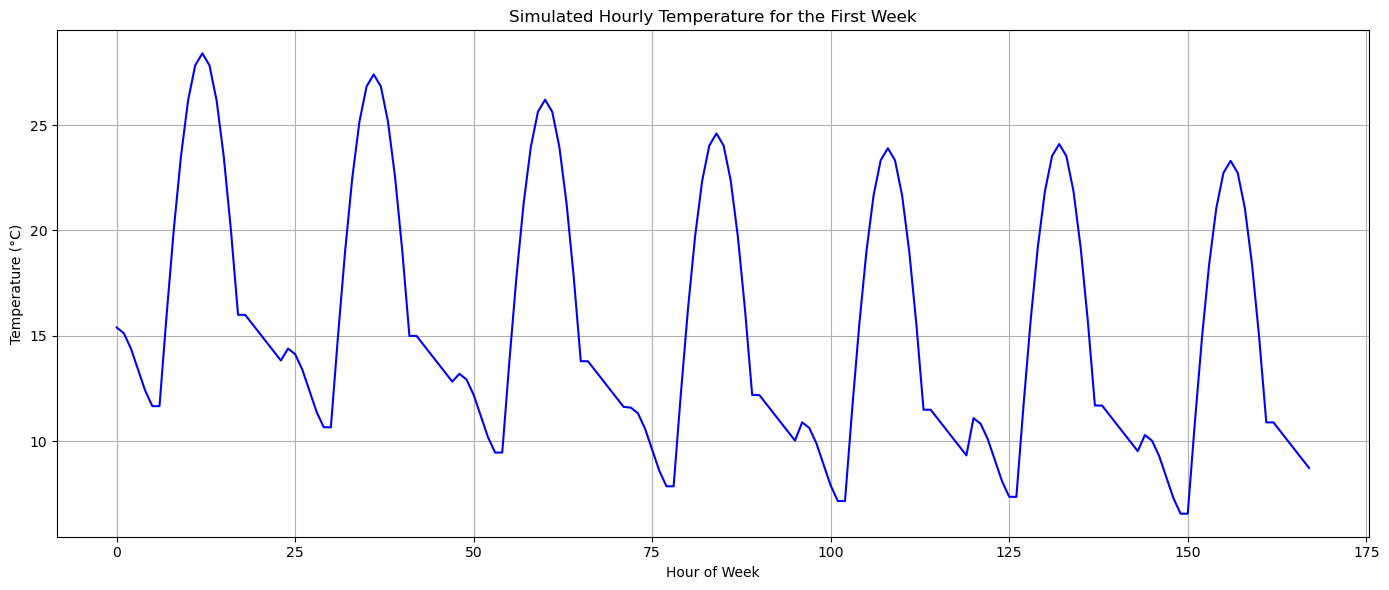

Hourly temperature simulation completed and saved as 'simulated_hourly_temperature.csv'.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file containing daily temperatures (adjust file path and column names as needed)
csv_file = 'temp_data_delhi.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Check the first few rows of the dataframe to understand the format and column names
print(df.head())

# Ensure that the 'Date' column is in datetime format
# Assuming the date format is "DD-MM-YYYY"
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')

# Extract the temperature at 00:00 hrs each day
daily_temp_00hrs = df['temp'].values

# Number of days and hours
days = len(daily_temp_00hrs)
total_hours = days * 24
time = np.arange(total_hours)  # Time array (in hours)

# Function to simulate hourly temperature for a given day based on the midnight temperature
def simulate_hourly_temp(daily_temp_at_midnight):
    """
    Simulate the hourly temperature for a given day using a smooth transition from midnight to midnight.
    Ensure that the peak temperature during the day is no more than 15°C higher than the midnight temperature.
    """
    # Create a time array for 24 hours for this specific day
    day_hours = np.arange(24)

    # Smooth decrease from 00:00 to 06:00 (no subtraction, just a small change based on a smooth curve)
    temp_morning = daily_temp_at_midnight + 2 * np.cos(np.pi * day_hours[:6] / 6)
    
    # Maximum peak temperature allowed is 15°C higher than midnight temperature
    max_day_temp = daily_temp_at_midnight + 15  # This is the upper limit for the daytime temperature
    
    # Smooth increase from 06:00 to 18:00 (increase temperature) but ensure it doesn't exceed max_day_temp
    temp_day = temp_morning[-1] + (max_day_temp - temp_morning[-1]) * np.sin(np.pi * (day_hours[6:18] - 6) / 12)
    
    # Smooth decrease from 18:00 to next day's midnight
    temp_night = temp_day[-1] - (temp_day[-1] - daily_temp_at_midnight) * (day_hours[18:] - 18) / 6

    # Concatenate all parts for a full day's temperature
    full_day_temp = np.concatenate([temp_morning, temp_day, temp_night])
    
    return full_day_temp

# Create an array to store hourly temperatures
hourly_temp = np.zeros(total_hours)

# Populate the hourly temperatures for each day
for i in range(days):
    daily_temp_at_midnight = daily_temp_00hrs[i]
    
    # Get the hourly temperature for this day
    start_index = i * 24
    end_index = (i + 1) * 24
    hourly_temp[start_index:end_index] = simulate_hourly_temp(daily_temp_at_midnight)

# Generate the datetime for each hour
start_datetime = df['datetime'].iloc[0]  # Get the first date in the dataset
datetimes = pd.date_range(start=start_datetime, periods=total_hours, freq='H')

# Convert the datetime to the required format (DD-MM-YYYY HH:MM:SS)
datetimes = datetimes.strftime('%d-%m-%Y %H:%M:%S')

# Plotting the simulated hourly temperatures for the first week (7 days = 7 * 24 = 168 hours)
plt.figure(figsize=(14, 6))

# Plot for the first week (first 7 days = 7 * 24 = 168 hours)
plt.plot(np.arange(168), hourly_temp[:168], label='Hourly Temperature', color='b')
plt.title('Simulated Hourly Temperature for the First Week')
plt.xlabel('Hour of Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Save the hourly temperature data to a new CSV file with a datetime column
output_df = pd.DataFrame({
    'Datetime': datetimes,
    'Hourly Temperature (°C)': hourly_temp
})

# Save the data to CSV
output_df.to_csv('simulated_hourly_temperature.csv', index=False)

print("Hourly temperature simulation completed and saved as 'simulated_hourly_temperature.csv'.")


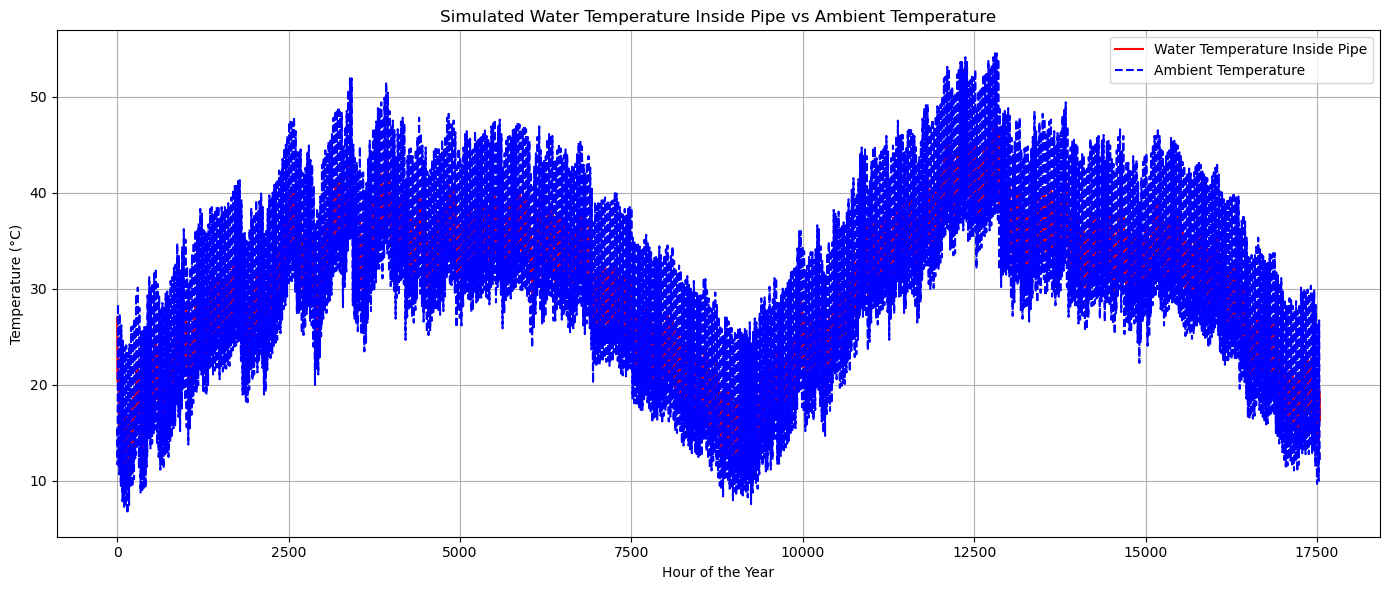

Water temperature simulation completed and saved as 'simulated_water_temperature.csv'.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the previously generated hourly ambient temperature data (simulated)
ambient_temp_file = 'simulated_hourly_temperature.csv'  # Path to the previously saved ambient temperature data
ambient_df = pd.read_csv(ambient_temp_file)

# Load the water flow rate data (replace with the actual CSV file containing flow rate data)
flow_rate_file = 'water_flow_data_with_anamoly_leak.csv'  # Replace with your water flow rate CSV file
flow_df = pd.read_csv(flow_rate_file)
# flow_df['Timestamp']=pd.to_datetime(flow_df['Timestamp'])
# flow_df=flow_df[flow_df['Timestamp']>='']
# Check if the flow rate and ambient temperature data have the same length
if len(flow_df) != len(ambient_df):
    raise ValueError("The length of the flow rate data and the ambient temperature data must match.")

# Assuming 'Flow Rate' column contains the water flow rates (m³/s) and is in the same order as ambient temperature
flow_rate = flow_df['Flow_Rate'].values  # Water flow rate (m³/s)
ambient_temperature = ambient_df['Hourly Temperature (°C)'].values  # Ambient temperature (°C)

# Initialize the water temperature inside the pipe
initial_water_temp = 27.0  # Initial water temperature in the pipe (°C)
water_temperature = np.zeros_like(ambient_temperature)  # Array to store water temperature
water_temperature[0] = initial_water_temp  # Start with the initial temperature

# Define heat transfer coefficient (alpha) and flow factor
alpha = 0.1  # Heat transfer coefficient, controls how quickly the water temperature responds to ambient temperature
flow_factor = flow_rate / np.max(flow_rate)  # Normalize the flow rate to range between 0 and 1

# Simulate the water temperature using Euler's method for numerical integration
for i in range(1, len(ambient_temperature)):
    # Calculate the rate of change of the water temperature
    delta_temp = alpha * (ambient_temperature[i] - water_temperature[i - 1]) * flow_factor[i - 1]
    
    # Update the water temperature using Euler's method (forward time step)
    water_temperature[i] = water_temperature[i - 1] + delta_temp

# Plot the results
plt.figure(figsize=(14, 6))

# Plot the water temperature inside the pipe
plt.plot(np.arange(len(water_temperature)), water_temperature, label='Water Temperature Inside Pipe', color='r')

# Plot the ambient temperature for reference
plt.plot(np.arange(len(ambient_temperature)), ambient_temperature, label='Ambient Temperature', color='b', linestyle='--')

plt.title('Simulated Water Temperature Inside Pipe vs Ambient Temperature')
plt.xlabel('Hour of the Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the simulated water temperature data to a new CSV file
output_df = pd.DataFrame({
    'Time (hours)': ambient_df['Hourly Temperature (°C)'],  # Assuming 'Time (hours)' column exists in ambient temperature data
    'Water Temperature (°C)': water_temperature
})

# Save the data to CSV
output_df.to_csv('simulated_water_temperature.csv', index=False)

print("Water temperature simulation completed and saved as 'simulated_water_temperature.csv'.")


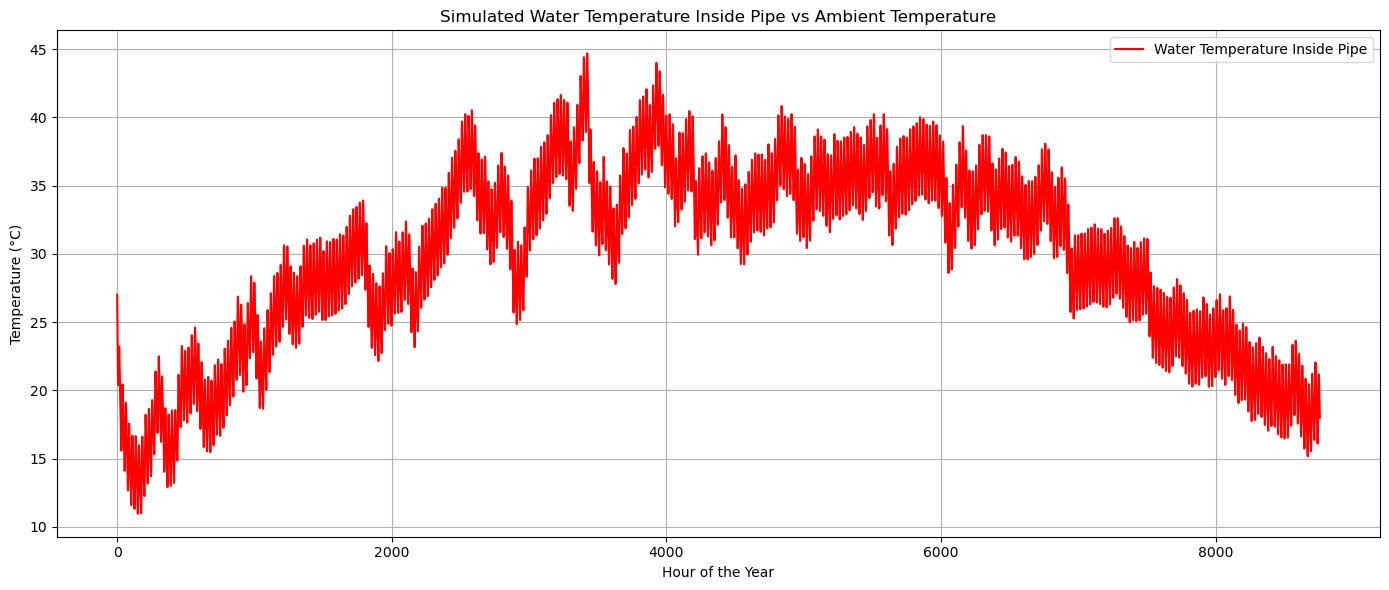

Water temperature simulation completed and saved as 'final_data.csv'.


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Load the previously generated hourly ambient temperature data (simulated)
ambient_temp_file = 'simulated_hourly_temperature.csv'  # Path to the previously saved ambient temperature data
ambient_df = pd.read_csv(ambient_temp_file)
ambient_df['Datetime'] = pd.to_datetime(ambient_df['Datetime'], format='%d-%m-%Y %H:%M:%S')
ambient_df=ambient_df[ambient_df['Datetime']<='31-12-2023 23:00']
# Load the water flow rate data (replace with the actual CSV file containing flow rate data)
flow_rate_file = 'water_flow_final.csv'  # Replace with your water flow rate CSV file
flow_df = pd.read_csv(flow_rate_file)

# Check if the flow rate and ambient temperature data have the same length
if len(flow_df) != len(ambient_df):
    raise ValueError("The length of the flow rate data and the ambient temperature data must match.")

# Assuming 'Flow Rate' and 'Pressure' columns exist in the flow rate data
flow_rate = flow_df['Flow_Rate'].values  # Water flow rate (m³/s)
ambient_temperature = ambient_df['Hourly Temperature (°C)'].values  # Ambient temperature (°C)
pressure = flow_df['Pressure'].values  # Assuming there is a Pressure column in the flow rate CSV

# Initialize the water temperature inside the pipe
initial_water_temp = 27.0  # Initial water temperature in the pipe (°C)
water_temperature = np.zeros_like(ambient_temperature)  # Array to store water temperature
water_temperature[0] = initial_water_temp  # Start with the initial temperature

# Define heat transfer coefficient (alpha) and flow factor
alpha = 0.1  # Heat transfer coefficient, controls how quickly the water temperature responds to ambient temperature
flow_factor = flow_rate / np.max(flow_rate)  # Normalize the flow rate to range between 0 and 1

# Simulate the water temperature using Euler's method for numerical integration
for i in range(1, len(ambient_temperature)):
    # Calculate the rate of change of the water temperature
    delta_temp = alpha * (ambient_temperature[i] - water_temperature[i - 1]) * flow_factor[i - 1]
    
    # Update the water temperature using Euler's method (forward time step)
    water_temperature[i] = water_temperature[i - 1] + delta_temp

# Plot the results
plt.figure(figsize=(14, 6))

# Plot the water temperature inside the pipe
plt.plot(np.arange(len(water_temperature)), water_temperature, label='Water Temperature Inside Pipe', color='r')

# Plot the ambient temperature for reference
# plt.plot(np.arange(len(ambient_temperature)), ambient_temperature, label='Ambient Temperature', color='b', linestyle='--')

plt.title('Simulated Water Temperature Inside Pipe vs Ambient Temperature')
plt.xlabel('Hour of the Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the simulated water temperature data to a new CSV file
output_df = pd.DataFrame({
    'Time (hours)': ambient_df['Datetime'],  # Assuming 'Time (hours)' exists in ambient temperature data
    'Ambient Temperature (°C)': ambient_temperature,
    'Flow Rate (m³/s)': flow_rate,
    'Pressure (Pa)': pressure,  # Pressure column from flow rate CSV
    'Water Temperature (°C)': water_temperature,
    'leak':flow_df['Leak_Detection']
})

# Save the data to CSV
output_df.to_csv('final_data.csv', index=False)

print("Water temperature simulation completed and saved as 'final_data.csv'.")


In [35]:
output_df.columns

Index(['Time (hours)', 'Ambient Temperature (°C)', 'Flow Rate (m³/s)',
       'Pressure (Pa)', 'Water Temperature (°C)', 'leak'],
      dtype='object')